<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158701 sha256=b296dcd97c43a196afdfeb1f880d179d9dc2c045e568c40a5100ba6eea3ac1a1
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=4a992810a63336ce59004be19c53ed3894c3d019f5e4920c3a855d188543182a
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


### **Objective:** The objective of this project assignment is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.

## **Packages**

In [3]:
import arff
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.impute import SimpleImputer

## **Importing Dataset**

In [7]:
#Load ARFF file
with open('/content/air_dataset.arff', 'r') as file:
  dataset = arff.load(file)

#Convert to DataFrame
air = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## **Data Cleaning**

In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### **Dealing with missing values**

In [9]:
air.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [10]:
missing_percent = air.isnull().mean()*100
missing_percent

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

In [11]:
air.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [12]:
air.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        888
PM10        1084
SO2          691
NO2         1212
CO           132
O3          1598
TEMP        2034
PRES         726
DEWP         645
RAIN         253
wd            16
WSPM         117
station       12
dtype: int64

<Axes: >

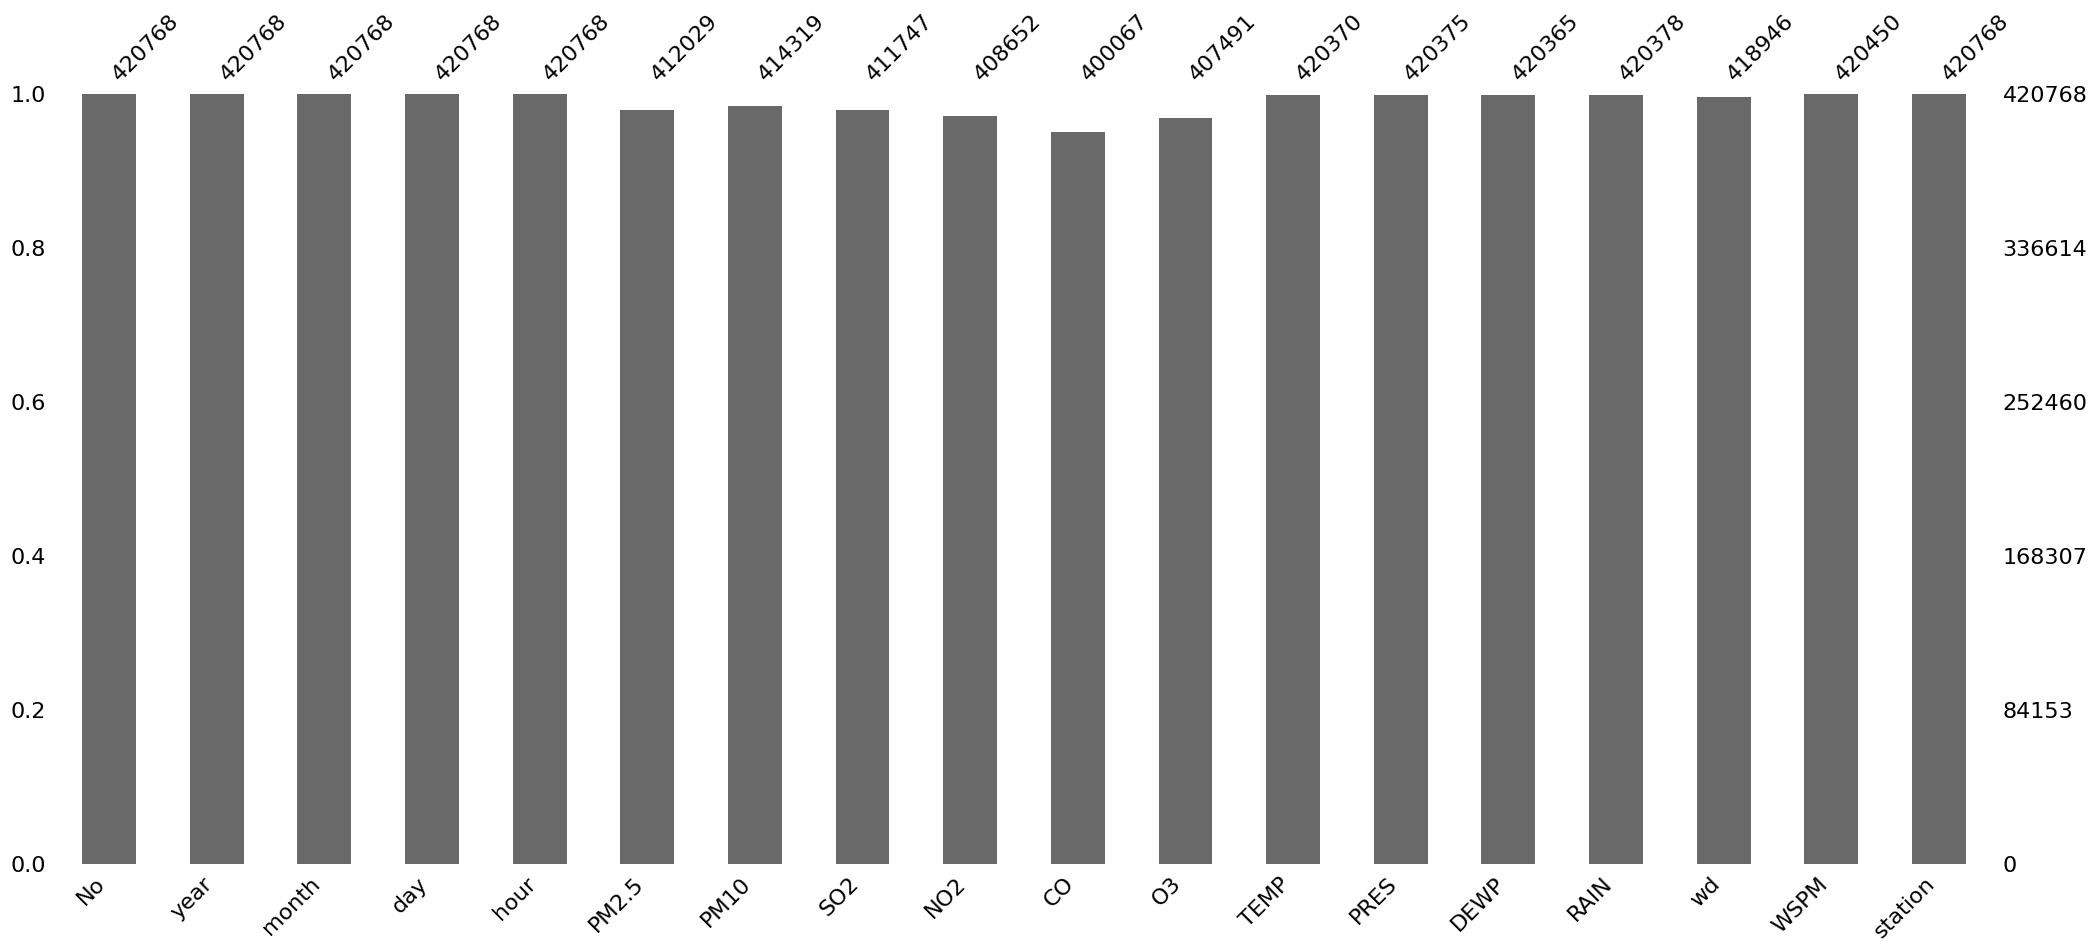

In [13]:
msno.bar(air)

<Axes: >

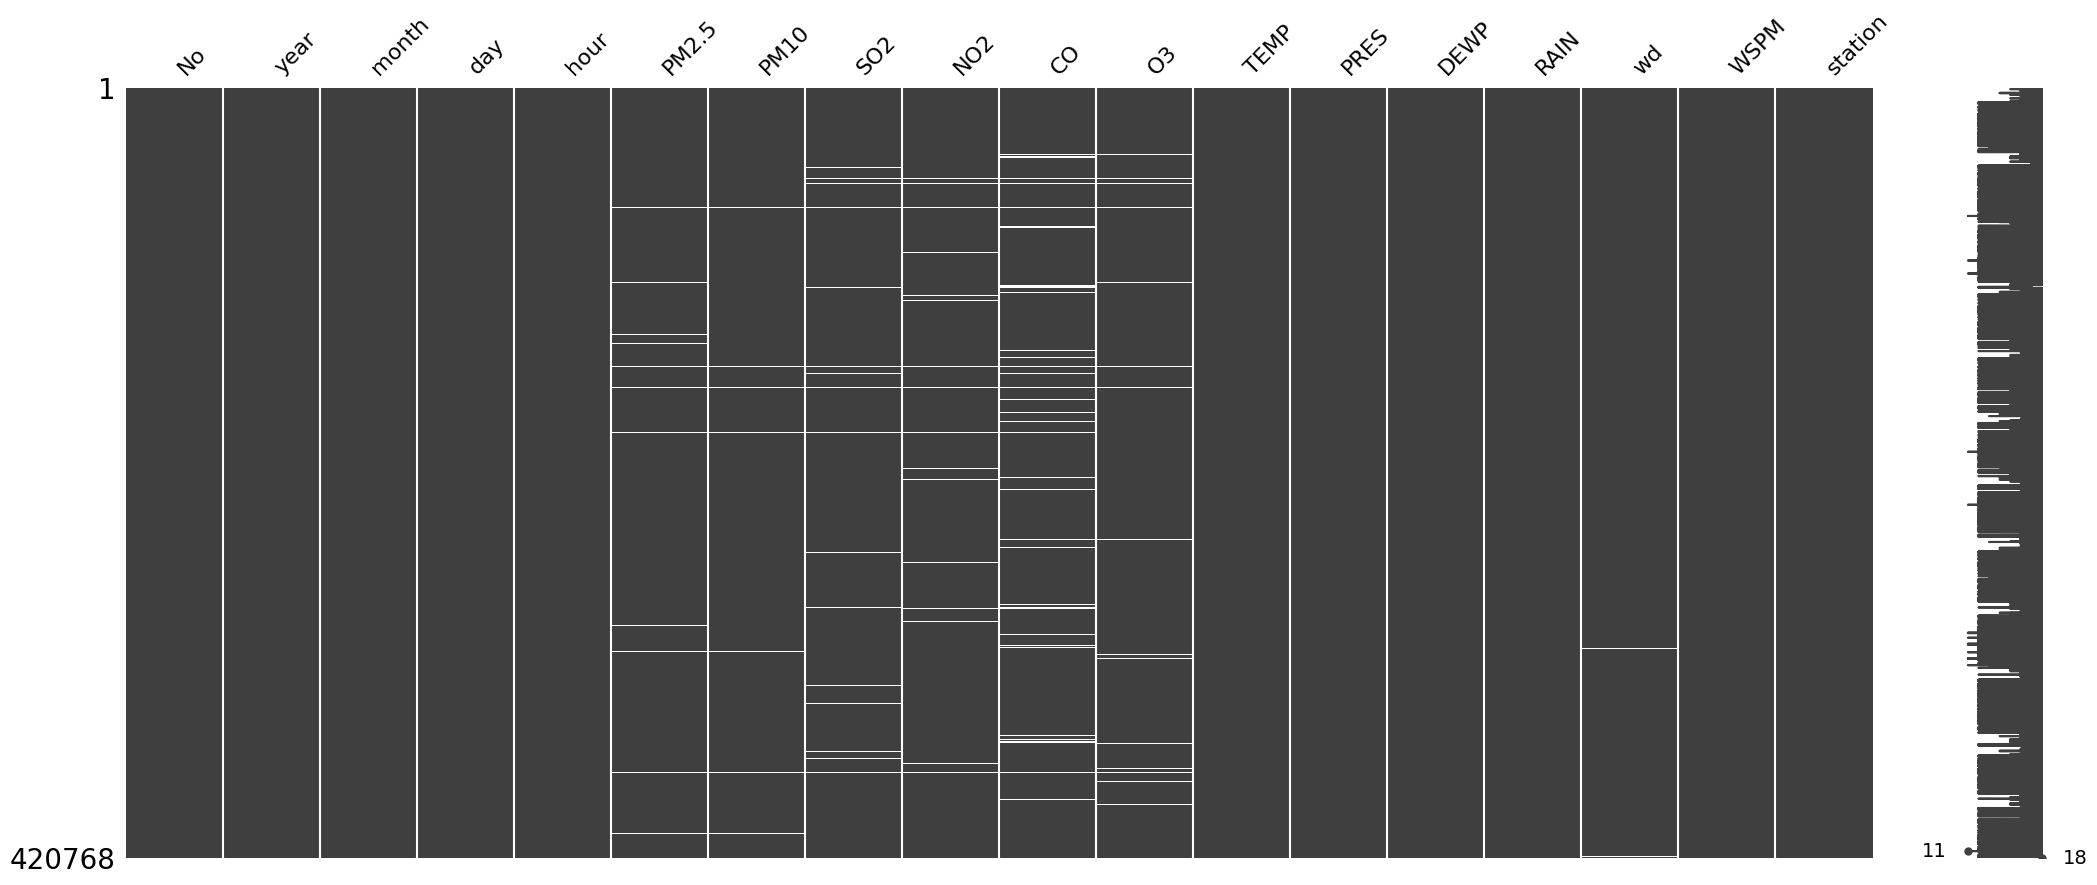

In [14]:
msno.matrix(air)

From the above, I do think  the values are  missing at random at random(MAR) meaning the values are missing due to observations from other variables

<Axes: >

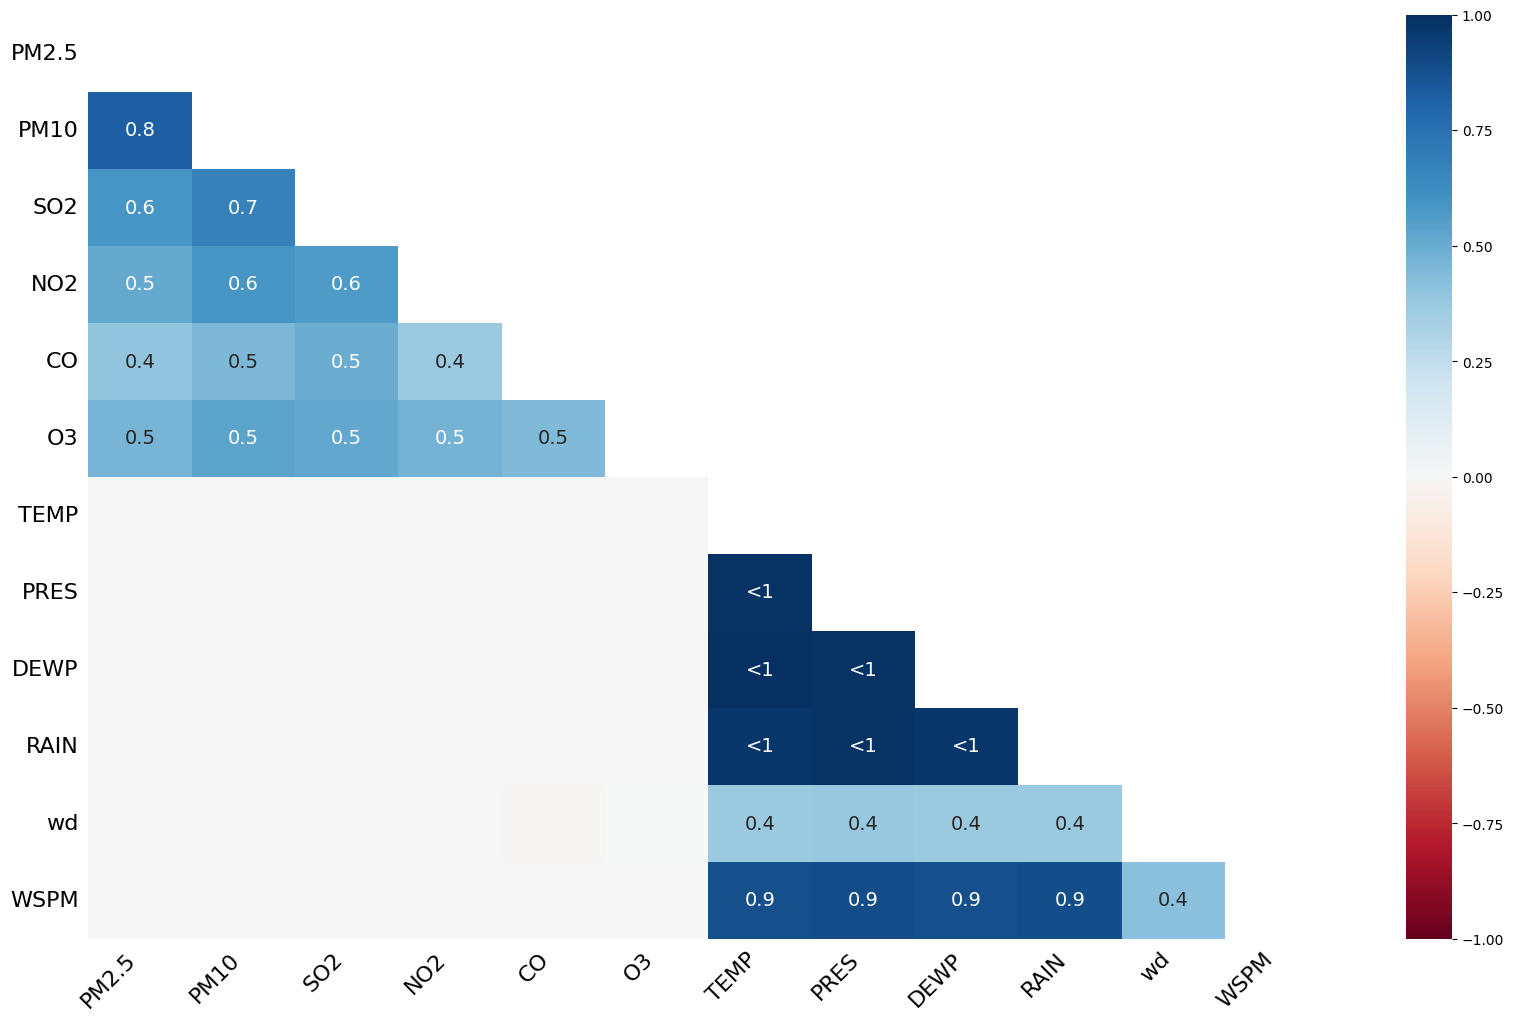

In [15]:
msno.heatmap(air)

## **Dealing with PM2.5 missing values**

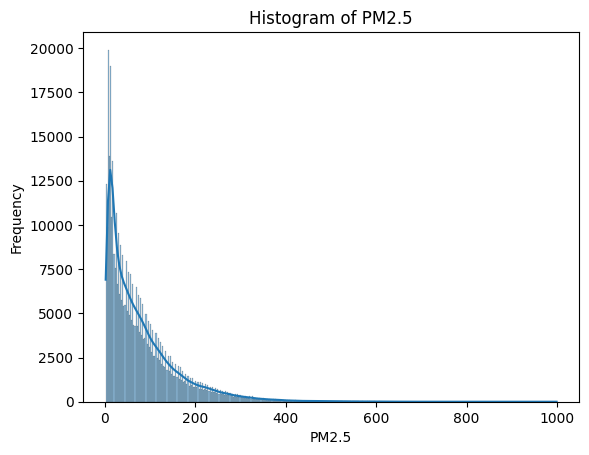

In [16]:
sns.histplot(data=air, x="PM2.5", kde=True)

plt.title("Histogram of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

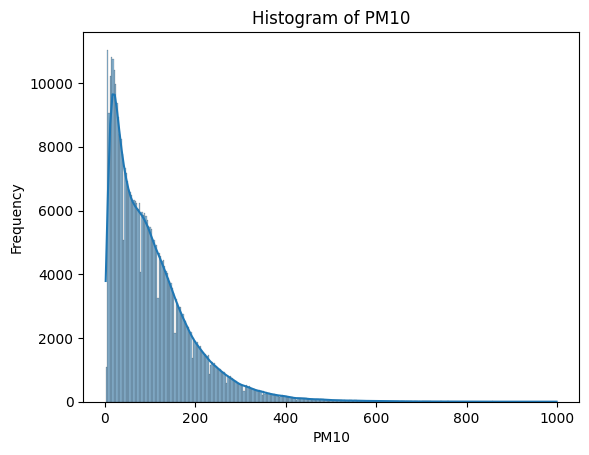

In [17]:
sns.histplot(data=air, x="PM10", kde=True)

plt.title("Histogram of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.show()

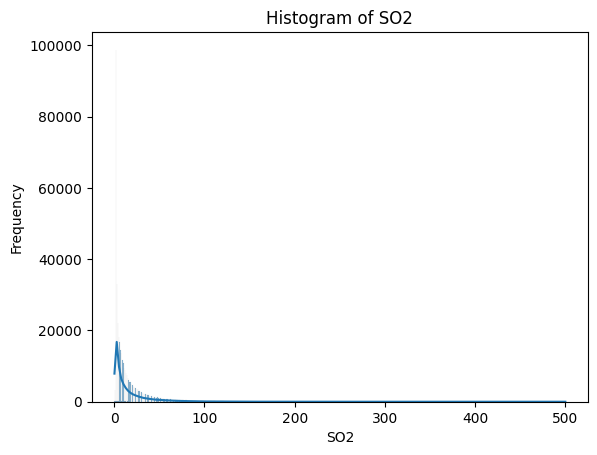

In [18]:
sns.histplot(data=air, x="SO2", kde=True)

plt.title("Histogram of SO2")
plt.xlabel("SO2")
plt.ylabel("Frequency")
plt.show()

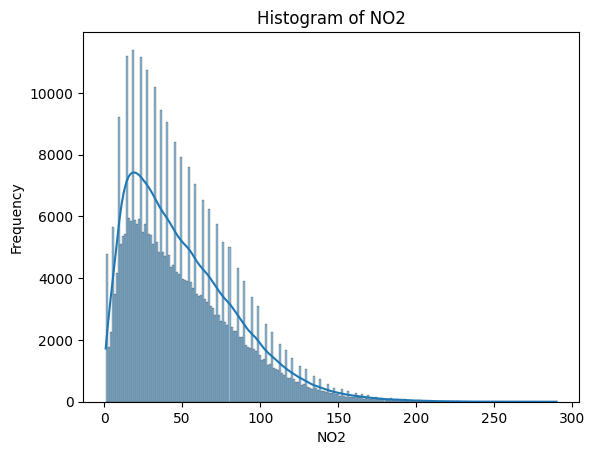

In [19]:
sns.histplot(data=air, x="NO2", kde=True)

plt.title("Histogram of NO2")
plt.xlabel("NO2")
plt.ylabel("Frequency")
plt.show()

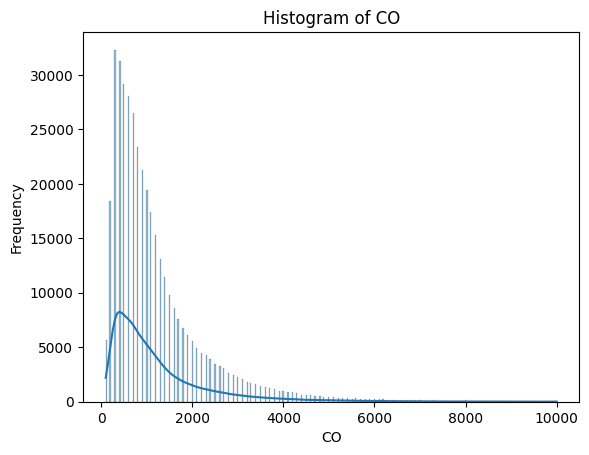

In [20]:
sns.histplot(data=air, x="CO", kde=True)

plt.title("Histogram of CO")
plt.xlabel("CO")
plt.ylabel("Frequency")
plt.show()

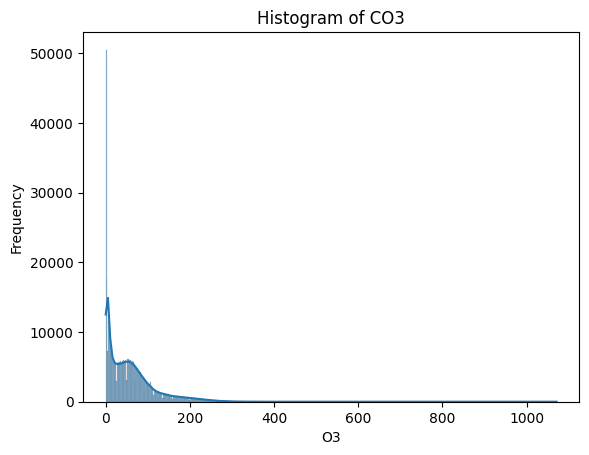

In [21]:
sns.histplot(data=air, x="O3", kde=True)

plt.title("Histogram of CO3")
plt.xlabel("O3")
plt.ylabel("Frequency")
plt.show()

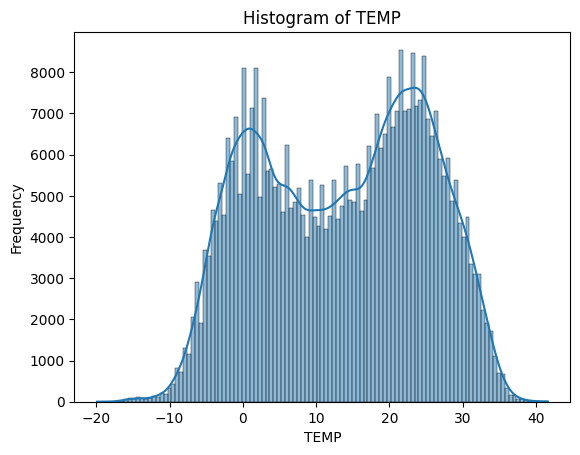

In [22]:
sns.histplot(data=air, x="TEMP", kde=True)

plt.title("Histogram of TEMP")
plt.xlabel("TEMP")
plt.ylabel("Frequency")
plt.show()

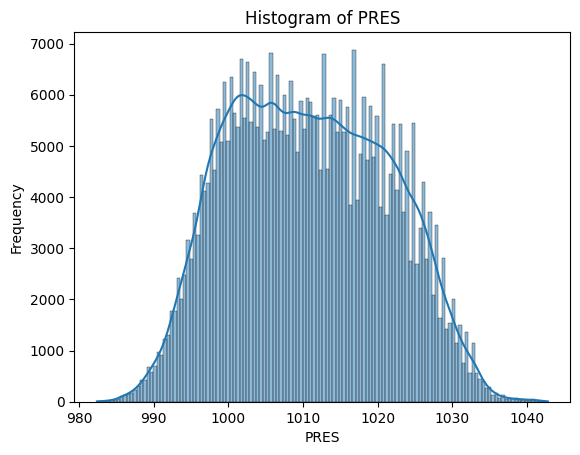

In [23]:
sns.histplot(data=air, x="PRES", kde=True)

plt.title("Histogram of PRES")
plt.xlabel("PRES")
plt.ylabel("Frequency")
plt.show()

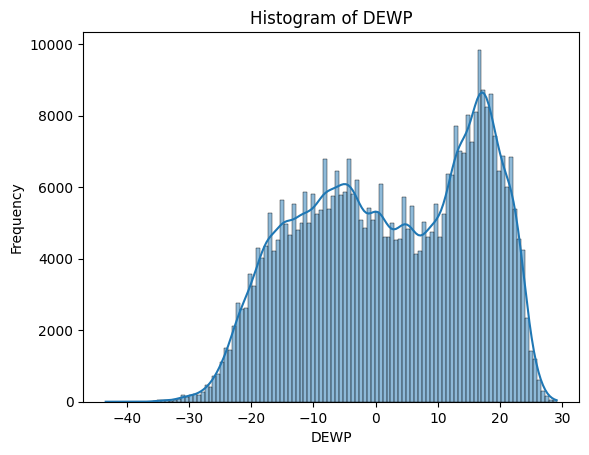

In [24]:
sns.histplot(data=air, x="DEWP", kde=True)

plt.title("Histogram of DEWP")
plt.xlabel("DEWP")
plt.ylabel("Frequency")
plt.show()

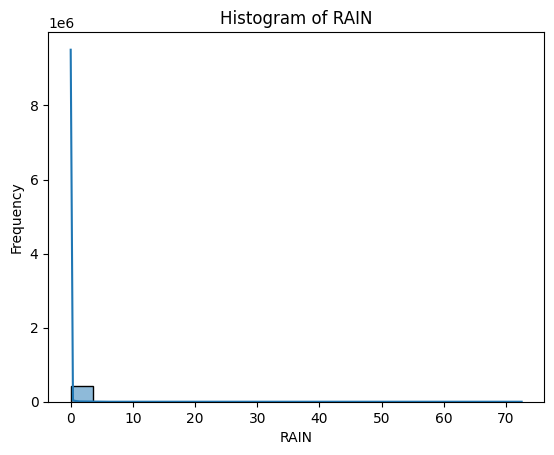

In [25]:
sns.histplot(data=air, x="RAIN", kde=True)

plt.title("Histogram of RAIN")
plt.xlabel("RAIN")
plt.ylabel("Frequency")
plt.show()

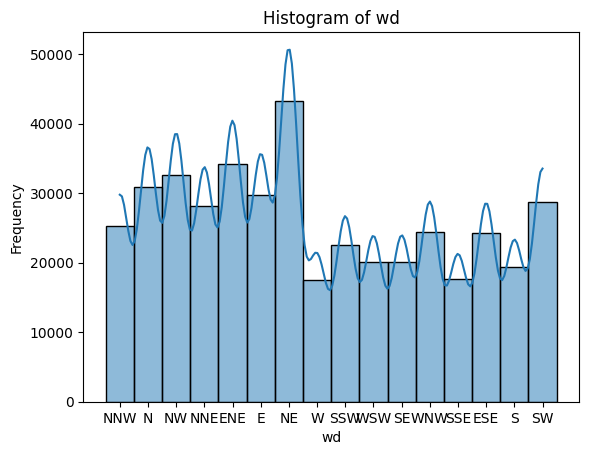

In [26]:
sns.histplot(data=air, x="wd", kde=True)

plt.title("Histogram of wd")
plt.xlabel("wd")
plt.ylabel("Frequency")
plt.show()

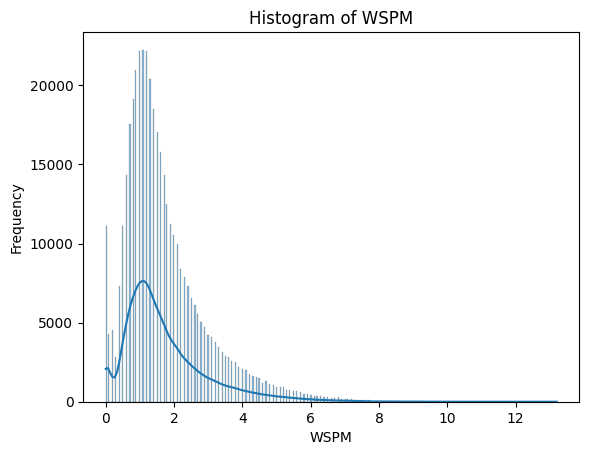

In [27]:
sns.histplot(data=air, x="WSPM", kde=True)

plt.title("Histogram of WSPM")
plt.xlabel("WSPM")
plt.ylabel("Frequency")
plt.show()

In [28]:
air.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [29]:
#Replacing with the median
from sklearn.impute import SimpleImputer

numerical_columns = ['PM2.5', 'PM10',	'SO2', 'NO2', 'CO','O3', 'RAIN', 'WSPM']

imputer= SimpleImputer(strategy='median')

air[numerical_columns] = imputer.fit_transform(air[numerical_columns])

In [30]:
#Replacing with the mean
from sklearn.impute import SimpleImputer

numerical_columns = ['TEMP', 'PRES',	'DEWP']

imputer= SimpleImputer(strategy='mean')

air[numerical_columns] = imputer.fit_transform(air[numerical_columns])

In [31]:
#Replacing with the most frequent value
from sklearn.impute import SimpleImputer

numerical_columns = ['wd']

imputer= SimpleImputer(strategy='most_frequent')

air[numerical_columns] = imputer.fit_transform(air[numerical_columns])

In [32]:
air.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [33]:
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## **Data Encoding**

## **Feature Engineering**
**Creating a datetime column**

In [34]:
# Combine year, month and day into a single datetime column
air['datetime'] = pd.to_datetime(air[['year', 'month', 'day']])

# Set the new column as the index
air.set_index('datetime', inplace=True)

# Drop the original date and time columns
air.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Sort by the datetime index
air.sort_index(inplace=True)

air.head()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,
2013-03-01,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,24,23,6.0,17.0,17.0,41.0,500.0,57.0,-0.5,1032.8,-19.7,0.0,NE,2.1,Nongzhanguan
2013-03-01,24,23,15.0,15.0,14.0,41.0,500.0,31.0,1.0,1029.6,-18.4,0.0,ENE,1.8,Wanshouxigong
2013-03-01,23,22,10.0,13.0,11.0,39.0,500.0,34.0,2.0,1029.5,-18.1,0.0,ENE,2.0,Wanshouxigong
2013-03-01,22,21,10.0,12.0,6.0,31.0,500.0,44.0,2.2,1029.2,-17.9,0.0,ENE,1.1,Wanshouxigong


## **EDA**

In [35]:
air.columns

Index(['No', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')